# Machine Learning algorithms

#### Importing Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle

#### Loading dataset

In [2]:
df = pd.read_csv('../data/imputed_decoded_dataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,YearlyCompensation,Age,Gender,Location,JobTitle,CompanyName,Description,PayPeriod,...,MLIncorporation,CoursesPlatform,MLExperienceYears,Education,DataScienceTeamSize,CompanySize,Industry,PrimaryToolSelected,RemoteFriendly,SalaryMedian
0,0,2353.0,"2,000-2,999",25-29,Female,Los Angeles Metropolitan Area,Administrative Assistant,Confidential,Administrative Assistant - Leading Real Estate...,YEARLY,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774
1,1,418.0,"2,000-2,999",25-29,Female,"Detroit, MI",2024 Summer Audit Information Technology Inter...,Comerica Bank,"Location(s):\n\nFarmington Hills, MI or Auburn...",MONTHLY,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774
2,2,621.0,"2,000-2,999",25-29,Female,"Morrisville, NC",5G System Architect Sr Principal Software Deve...,Oracle,Job Description\n\nGroup Description\n\nThe Or...,YEARLY,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Medium,Retail,"Business intelligence software (Salesforce, Ta...",No,100614.164708
3,3,5032.0,"2,000-2,999",25-29,Female,"Jonesboro, AR",Associate Team Leader,H&R Block,What You'll Bring To The Team...\n\nSupport th...,YEARLY,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774
4,4,11616.0,"2,000-2,999",25-29,Female,"Fort Myers, FL",Collections Specialist,Rang Technologies Inc,Title: Collections Specialist Location: 13200 ...,YEARLY,...,We are exploring ML methods (and may one day p...,Coursera,3-4 years,Doctoral degree,1-2,Large,Entertainment,"Business intelligence software (Salesforce, Ta...",No,98161.557774


In [3]:
df['CoursesPlatform'].value_counts()

CoursesPlatform
Coursera    12000
Name: count, dtype: int64

In [4]:
len(df)

12000

In [5]:
df2 = pd.read_csv('../data/imputed_dataset.csv')
print(df2['CoursesCoursera'])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: CoursesCoursera, dtype: int64


## Question 1 Solution
How effective are online learning platforms in improving job market readiness compared to traditional university degrees ?

### Hypothesis 2 Solution
Learning from online platforms helps professionals gain more Machine Learning experience in their respective job titles. This occurs because online platforms supplements formal education by providing more up-to-date knowledge and more practical experience.

#### Preproceessing dataset

In [30]:
df['Age'].value_counts()

Age
25-29    9214
35-39    2148
30-34     266
22-24     112
18-21      68
40-44      61
45-49      45
50-54      31
55-59      29
60-69      21
70+         5
Name: count, dtype: int64

In [6]:
# Selecting relevant features
# Assuming 'MLExperienceYears' is the target variable and 'CoursesCoursera', 'Education', 'JobTitle' are relevant 
# Modify these column names based on your actual data
features = ['CoursesPlatform', 'Education', 'JobTitle', 'Industry', 'Age']  # Add or modify columns based on available relevant features
X = df[features]
y = df['MLExperienceYears']  # Target variable

In [7]:
i = 0
experience_mapping = {}
y.loc[y == 0] = '< 1 years'

for k in y.unique():
    experience_mapping[k] = i
    i+=1

y = y.map(experience_mapping)

/var/folders/kl/11gkxl5x49l9sffk443vsksh0000gq/T/ipykernel_10150/2021710490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y == 0] = '< 1 years'


In [8]:
def detect_and_ordinal_encode(df):
    # Create a copy of the original dataframe
    df_encoded = df.copy()
    
    # Initialize a dictionary to store label encoders for each column
    label_encoders = {}

    # Loop through columns
    for col in df_encoded.columns:
        # Check if column is categorical (object type)
        if df_encoded[col].dtype == 'object':
            # Apply Label Encoding
            le = LabelEncoder()
            non_na_mask = df_encoded[col].notna()  # Mask for non-NaN values
            df_encoded.loc[non_na_mask, col] = le.fit_transform(df_encoded.loc[non_na_mask, col].astype(str))
            # df_encoded[col] = df_encoded[col].astype(str).apply(lambda x: le.fit_transform([x]) if pd.notna(x) else x)

            
            # Store the LabelEncoder for future use (e.g., for decoding or applying to test data)
            label_encoders[col] = le

    return df_encoded, label_encoders

encoded_X , labels_encoders = detect_and_ordinal_encode(X)

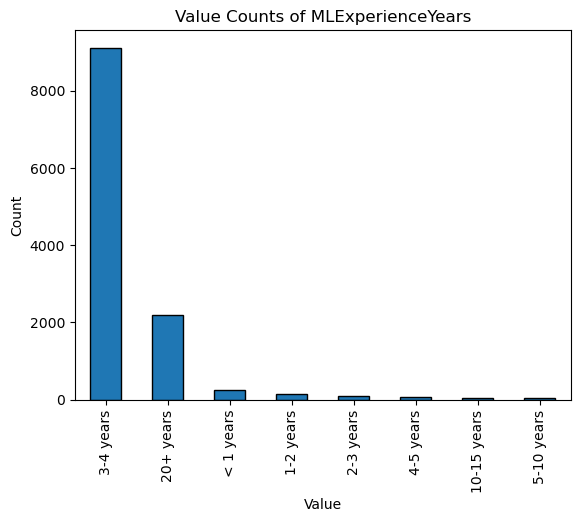

In [9]:
df['MLExperienceYears'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Count')
plt.title(f'Value Counts of MLExperienceYears')
plt.show()

As we can see 'MLExperienceYears' catagorical column is highly imbalanced. Hence, we used Random Forest Classifier with 'class_weight="balanced"' to tackle highly imbalanced distribution of experience ranges.

In [10]:
X.head()

,CoursesPlatform,Education,JobTitle,Industry,Age
0,Coursera,Doctoral degree,Administrative Assistant,Entertainment,25-29
1,Coursera,Doctoral degree,2024 Summer Audit Information Technology Inter...,Entertainment,25-29
2,Coursera,Doctoral degree,5G System Architect Sr Principal Software Deve...,Retail,25-29
3,Coursera,Doctoral degree,Associate Team Leader,Entertainment,25-29
4,Coursera,Doctoral degree,Collections Specialist,Entertainment,25-29


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: MLExperienceYears, dtype: int64

In [12]:
encoded_X.head()

,CoursesPlatform,Education,JobTitle,Industry,Age
0,0,1,1365,2,2
1,0,1,349,2,2
2,0,1,534,6,2
3,0,1,3006,2,2
4,0,1,6397,2,2


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.3, random_state=42)

In [14]:
X_train.head()

,CoursesPlatform,Education,JobTitle,Industry,Age
7729,0,1,209,2,2
3546,0,1,2708,2,2
3527,0,1,3006,2,2
10159,0,1,3223,2,2
6959,0,1,5004,2,2


#### Model Initialization

In [15]:
# Initialize the Random Forest model
model2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the model
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Measuring model performance

In [16]:
# Make predictions on the test set
y_pred = model2.predict(X_test)

y_test_arr = y_test.to_numpy()

# Evaluate the model
accuracy = accuracy_score(y_test_arr, y_pred)
classification_rep = classification_report(y_test_arr, y_pred)
conf_matrix = confusion_matrix(y_test_arr, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2703
           1       1.00      0.97      0.98       678
           2       0.34      0.69      0.46        16
           3       0.16      0.18      0.17        28
           4       0.17      0.22      0.19        32
           5       0.46      0.86      0.60        14
           6       0.33      0.36      0.34        77
           7       0.27      0.27      0.27        52

    accuracy                           0.94      3600
   macro avg       0.47      0.57      0.50      3600
weighted avg       0.95      0.94      0.95      3600



<Figure size 500x500 with 0 Axes>

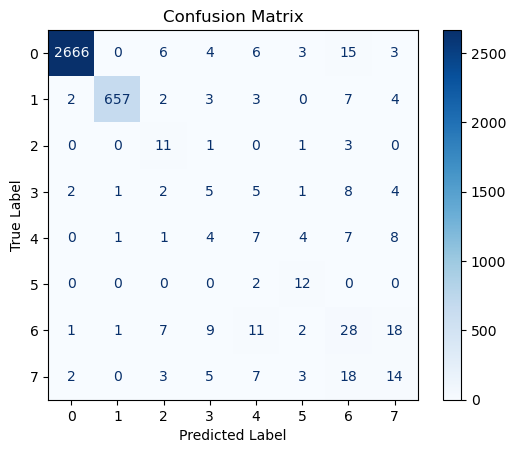

In [17]:
fig = plt.figure()
fig.set_size_inches(5,5)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)  # Choose a color map (optional)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

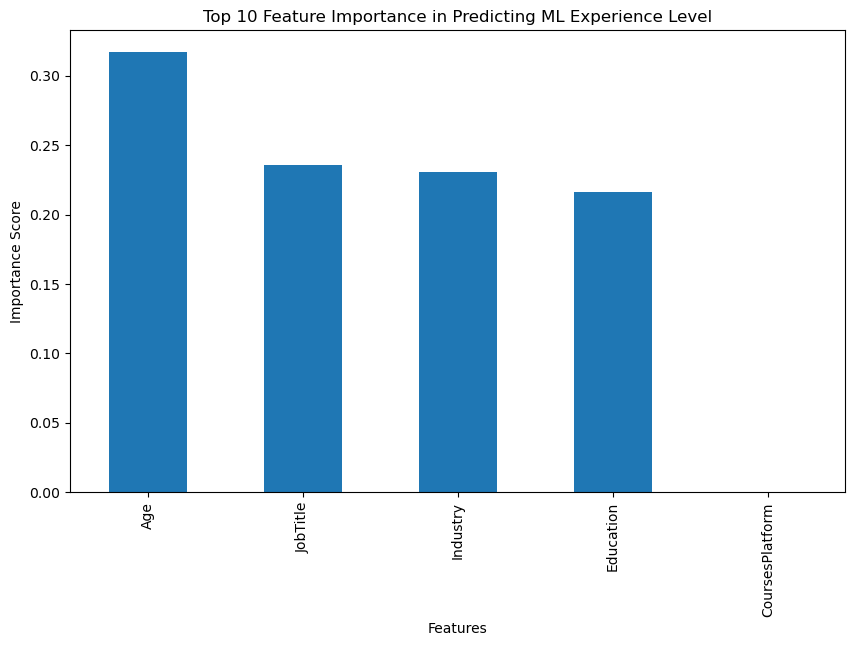

In [18]:
importances = model2.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
top_features = feature_importances.head(10)


# Plot feature importances
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar')
plt.title("Top 10 Feature Importance in Predicting ML Experience Level")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

#### Conclusion
<b>Justification for using RFC</b>

Random Forest Classifier (RFC) can effectively manage complex relationships and non-linear boundaries between features, which is useful for diverse feature like job title, education, course completions. Since RFC is a ensemble of decision trees, it is robust and avoid overfitting to dataset. Random Forest provides feature importance scores, allowing us to see which factors (e.g., online courses, years of experience, job title) are most influential in determining machine learning experience years.

<b>Tuning the model</b>

Since our output column MLExperienceYears was highly imbalanced, where certain experience ranges are far more common than others, we used class_weight='balanced' in RFC to address this skew. The balanced parameter adjusts the weights inversely to class frequencies, ensuring that the model gives more importance to underrepresented salary categories.

<b>Effectiveness</b>
1. Confusion matrix analysis<br>

The confusion matrix shows that the Random Forest model accurately predicts experience levels for professionals with substantial ML experience, with high diagonal values for those categories. This supports the hypothesis by demonstrating that individuals with online learning credentials tend to have measurable experience in ML roles.

2. Feature importance metric<br>

The feature importance plot highlights that education specially doctorate level and job roles with ML involvement are significant predictors of experience levels. This aligns with our hypothesis that online learning plays a key role in professional development for ML roles

### Model saving

In [19]:
with open('model2.pkl', 'wb') as file:
    pickle.dump(model2, file)

In [20]:
import pickle

# Save the LabelEncoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(labels_encoders, file)


## Model loading

In [21]:
with open('model2.pkl', 'rb') as file:
    model = pickle.load(file)

In [22]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7])

In [23]:
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

In [24]:
label_encoder.keys()

dict_keys(['CoursesPlatform', 'Education', 'JobTitle', 'Industry', 'Age'])

In [25]:
def dataframe_decoder(df, labelEncoder):
    # Decode the values in df_encoded
    df_decoded = df.copy()

    for col, le in labelEncoder.items():
        # Apply the inverse transform to each encoded column
        df_decoded[col] = le.inverse_transform(df_decoded[col])

    return df_decoded

In [26]:
def dataframe_encoder(df, labelEncoder):
    df_encode = df.copy()

    for col, le in labelEncoder.items():
        df_encode[col] = le.transform(df_encode[col])

    return df_encode

In [27]:
df_test = pd.DataFrame({
    "CoursesPlatform": 0,
    "Education": 2,
    "JobTitle": 349,
}, index=[0])

In [28]:
encoded_X

,CoursesPlatform,Education,JobTitle,Industry,Age
0,0,1,1365,2,2
1,0,1,349,2,2
2,0,1,534,6,2
3,0,1,3006,2,2
4,0,1,6397,2,2
...,...,...,...,...,...
11995,0,2,6585,5,4
11996,0,2,1102,5,4
11997,0,1,1924,2,2
11998,0,1,897,2,2


In [29]:
decoded = dataframe_decoder(df_test, label_encoder)

KeyError: 'Industry'

In [ ]:
X.value_counts()

CoursesCoursera  Education          JobTitle                                                                                               
Coursera         Master’s degree    Business Analyst                                                                                           414
                 Bachelor’s degree  Business Analyst                                                                                           235
                 Doctoral degree    Administrative Assistant                                                                                   117
                                    Account Executive                                                                                          111
                                    Business Analyst                                                                                           101
                                                                                                                             

In [ ]:
df['ExperienceLevel'].value_counts()

ExperienceLevel
Entry level         4101
Mid-Senior level    3178
Executive           1517
Internship          1508
Associate           1105
Director             591
Name: count, dtype: int64

### Column rename

In [ ]:
df = df.rename(columns={"CoursesCoursera": "CoursesPlatform"})
df.to_csv('../data/imputed_decoded_dataset.csv')


In [31]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'YearlyCompensation', 'Age', 'Gender',
       'Location', 'JobTitle', 'CompanyName', 'Description', 'PayPeriod',
       'SalaryMin', 'WorkType', 'WorkType.1', 'ListedTime', 'ApplicationType',
       'ExperienceLevel', 'ListedTime.1', 'PostingDomain', 'WorkType.2',
       'WorkType.3', 'Currency', 'CompensationType', 'ZipCode',
       'MLIncorporation', 'CoursesPlatform', 'MLExperienceYears', 'Education',
       'DataScienceTeamSize', 'CompanySize', 'Industry', 'PrimaryToolSelected',
       'RemoteFriendly', 'SalaryMedian'],
      dtype='object')

In [ ]:
df.columns

Index(['Unnamed: 0', 'YearlyCompensation', 'Age', 'Gender', 'Location',
       'JobTitle', 'CompanyName', 'Description', 'PayPeriod', 'SalaryMin',
       'WorkType', 'WorkType.1', 'ListedTime', 'ApplicationType',
       'ExperienceLevel', 'ListedTime.1', 'PostingDomain', 'WorkType.2',
       'WorkType.3', 'Currency', 'CompensationType', 'ZipCode',
       'MLIncorporation', 'CoursesPlatform', 'MLExperienceYears', 'Education',
       'DataScienceTeamSize', 'CompanySize', 'Industry', 'PrimaryToolSelected',
       'RemoteFriendly', 'SalaryMedian'],
      dtype='object')

In [36]:
df['SalaryMedian'].min()

67469.06375432406

In [37]:
df['Industry']

0        Entertainment
1        Entertainment
2               Retail
3        Entertainment
4        Entertainment
             ...      
11995    Manufacturing
11996    Manufacturing
11997    Entertainment
11998    Entertainment
11999           Energy
Name: Industry, Length: 12000, dtype: object